# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define the units for temperature (imperial for Fahrenheit)
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Retrieval is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila do maio
Processing Record 2 of Set 1 | smithers
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | zharkent
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | stone
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | yerofey pavlovich
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | negara
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | bukama
Processing Reco

Processing Record 41 of Set 4 | ponta delgada
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | port moresby
Processing Record 44 of Set 4 | siwa oasis
Processing Record 45 of Set 4 | vilyuchinsk
Processing Record 46 of Set 4 | berdigestyakh
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | oumache
Processing Record 49 of Set 4 | bismarck
Processing Record 0 of Set 5 | adrar
Processing Record 1 of Set 5 | tughyl
Processing Record 2 of Set 5 | inhambane
Processing Record 3 of Set 5 | santa terezinha
Processing Record 4 of Set 5 | nar'yan-mar
Processing Record 5 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 6 of Set 5 | muana
Processing Record 7 of Set 5 | tazovsky
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | hayma'
City not found. Skipping...
Processing Record 10 of Set 5 | itubera
Processing Record 11 of Set 5 | ekibastuz
Processing Record 12 of Set 5 | port alfred
Processing Record 13 of Set 5 |

Processing Record 35 of Set 8 | selfoss
Processing Record 36 of Set 8 | rongelap
Processing Record 37 of Set 8 | plymouth
Processing Record 38 of Set 8 | playa vicente
Processing Record 39 of Set 8 | serenje
Processing Record 40 of Set 8 | ulladulla
Processing Record 41 of Set 8 | mutuali
Processing Record 42 of Set 8 | la passe
Processing Record 43 of Set 8 | heunghae
Processing Record 44 of Set 8 | puerto deseado
Processing Record 45 of Set 8 | rouissat
Processing Record 46 of Set 8 | springhill
Processing Record 47 of Set 8 | shendi
Processing Record 48 of Set 8 | minas de marcona
Processing Record 49 of Set 8 | yoloten
Processing Record 0 of Set 9 | tidjikja
Processing Record 1 of Set 9 | siguiri
Processing Record 2 of Set 9 | rauma
Processing Record 3 of Set 9 | parabel'
Processing Record 4 of Set 9 | tofol
Processing Record 5 of Set 9 | misratah
Processing Record 6 of Set 9 | grand falls-windsor
Processing Record 7 of Set 9 | arno
Processing Record 8 of Set 9 | palikir - national

Processing Record 26 of Set 12 | papao
Processing Record 27 of Set 12 | vernon
Processing Record 28 of Set 12 | farafangana
Processing Record 29 of Set 12 | kaka
Processing Record 30 of Set 12 | farap
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | saynshand
Processing Record 33 of Set 12 | arthur's town
City not found. Skipping...
Processing Record 34 of Set 12 | karkira
Processing Record 35 of Set 12 | ghat
Processing Record 36 of Set 12 | puno
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila do maio,15.1333,-23.2167,81.39,86,0,13.91,CV,1713243994
1,smithers,54.7804,-127.1743,39.52,60,100,4.61,CA,1713243994
2,grytviken,-54.2811,-36.5092,33.49,81,14,12.64,GS,1713243733
3,port-aux-francais,-49.3500,70.2167,39.02,64,92,34.34,TF,1713243994
4,wailua homesteads,22.0669,-159.3780,75.63,77,75,9.22,US,1713243994


In [8]:
# Export the City_Data into a csv
import os

# Check if the directory exists, if not, create it
output_data_dir = "output_data"
if not os.path.exists(output_data_dir):
    os.makedirs(output_data_dir)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila do maio,15.1333,-23.2167,81.39,86,0,13.91,CV,1713243994
1,smithers,54.7804,-127.1743,39.52,60,100,4.61,CA,1713243994
2,grytviken,-54.2811,-36.5092,33.49,81,14,12.64,GS,1713243733
3,port-aux-francais,-49.3500,70.2167,39.02,64,92,34.34,TF,1713243994
4,wailua homesteads,22.0669,-159.3780,75.63,77,75,9.22,US,1713243994


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

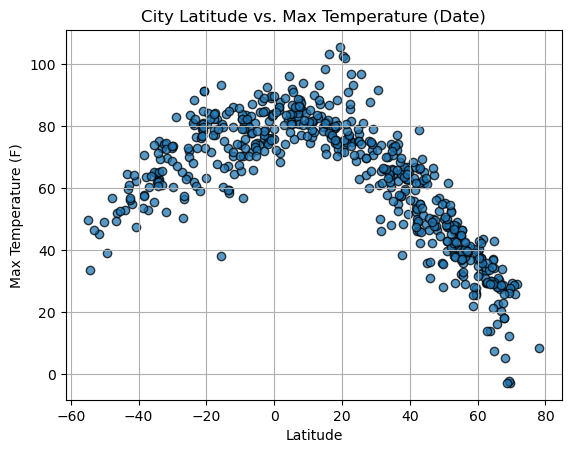

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

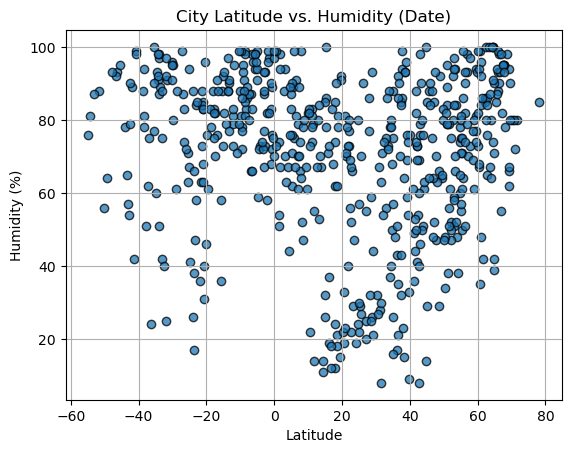

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

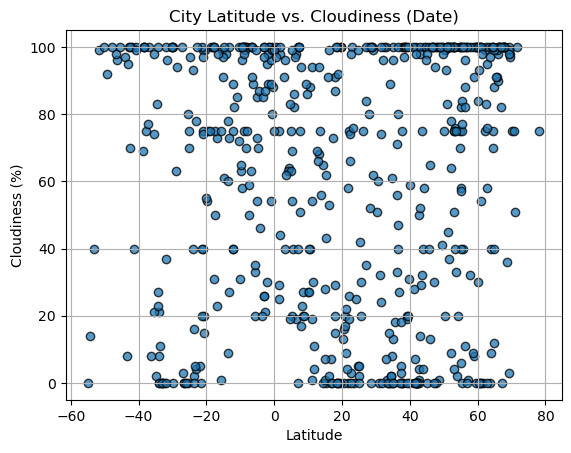

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

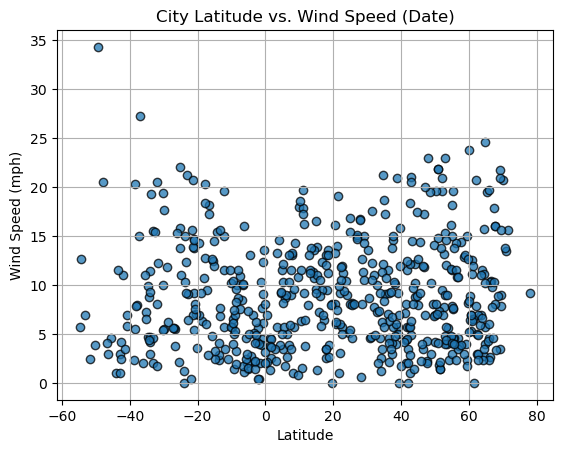

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot data
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate the linear regression
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'Latitude vs. {title}')

    # Print r square value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila do maio,15.1333,-23.2167,81.39,86,0,13.91,CV,1713243994
1,smithers,54.7804,-127.1743,39.52,60,100,4.61,CA,1713243994
4,wailua homesteads,22.0669,-159.3780,75.63,77,75,9.22,US,1713243994
7,zharkent,44.1628,80.0000,61.45,61,100,12.12,KZ,1713243841
8,olonkinbyen,70.9221,-8.7187,25.93,72,51,13.49,SJ,1713243737


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,33.49,81,14,12.64,GS,1713243733
3,port-aux-francais,-49.3500,70.2167,39.02,64,92,34.34,TF,1713243994
5,adamstown,-25.0660,-130.1015,71.96,67,70,22.03,PN,1713243994
6,bredasdorp,-34.5322,20.0403,62.04,93,83,4.74,ZA,1713243994
12,hithadhoo,-0.6000,73.0833,83.95,76,100,12.35,MV,1713243712


###  Temperature vs. Latitude Linear Regression Plot

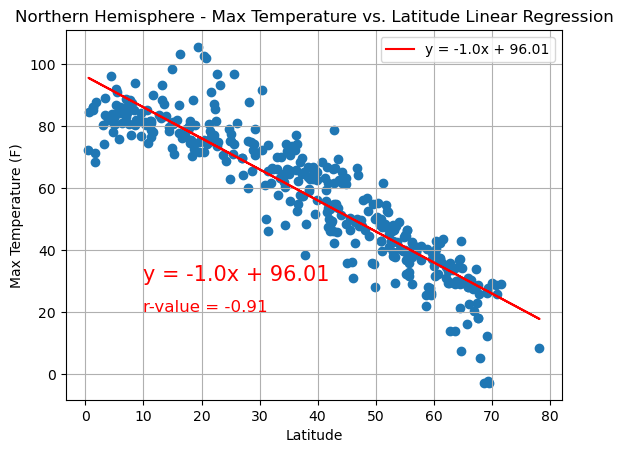

The r-value is: -0.91335598307676


In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Annotate the plot with the line equation and r-value
plt.annotate(line_eq, (10, 30), fontsize=15, color="red")
plt.annotate(f"r-value = {r_value:.2f}", (10, 20), fontsize=12, color="red")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Save the plot as a PNG file
plt.savefig("output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

# Print the r-value
print(f"The r-value is: {r_value}")


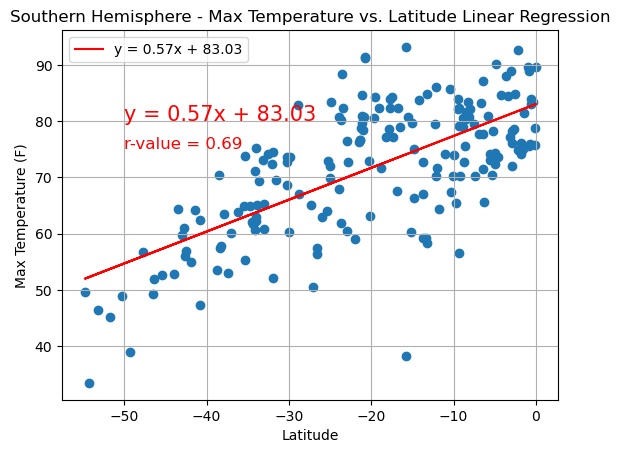

The r-value is: 0.6869565047023259


In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Annotate the plot with the line equation and r-value
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
plt.annotate(f"r-value = {r_value:.2f}", (-50, 75), fontsize=12, color="red")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Save the plot as a PNG file
plt.savefig("output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()

# Print the r-value
print(f"The r-value is: {r_value}")


**Discussion about the linear relationship:** Based on the linear regression analysis we can observe that there is moderately storng positive correlation. This is indicated by the positive slope and the relatively high coefficient, this implies that as we move closer to the equator temperatures increase.

### Humidity vs. Latitude Linear Regression Plot

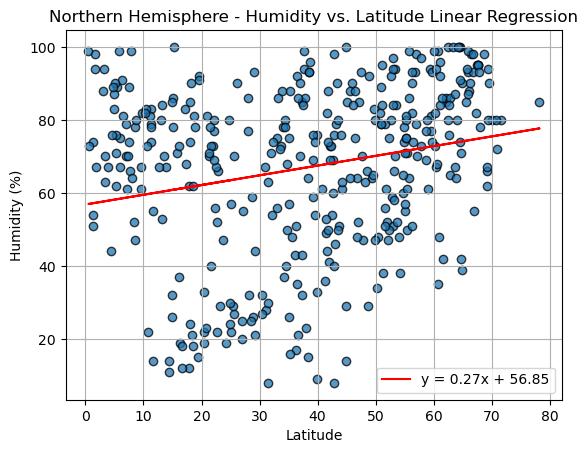

The r-value is: 0.227936651664753


In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()
plt.show()

print(f"The r-value is: {rvalue}")


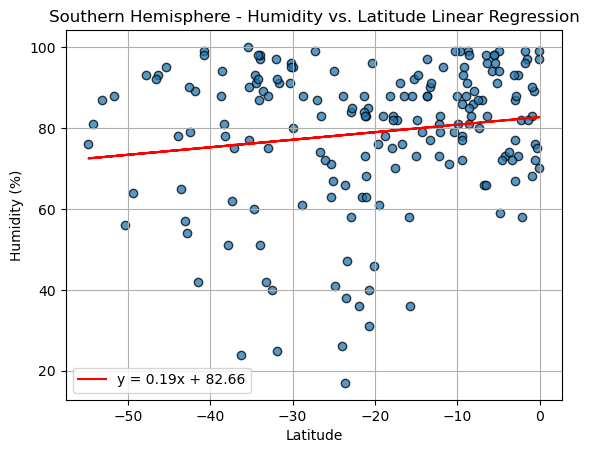

The r-value is: 0.15074696277778182


In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()
plt.show()

print(f"The r-value is: {rvalue}")



**Discussion about the linear relationship:** The linear regression analysis indicates a weak positive correlation between latitude and humidity in both the Northern Hemisphere (r-value: 0.23) and the Southern Hemisphere (r-value: 0.15). This suggests that there is a slight tendency for humidity to increase as you move away from the equator in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

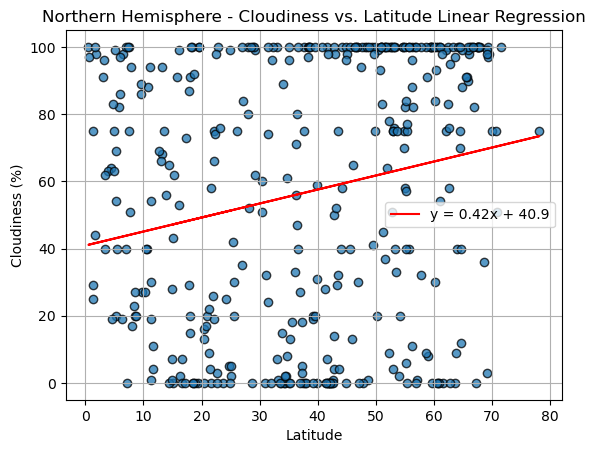

The r-value is: 0.21038726066597743


In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()
plt.show()

print(f"The r-value is: {rvalue}")


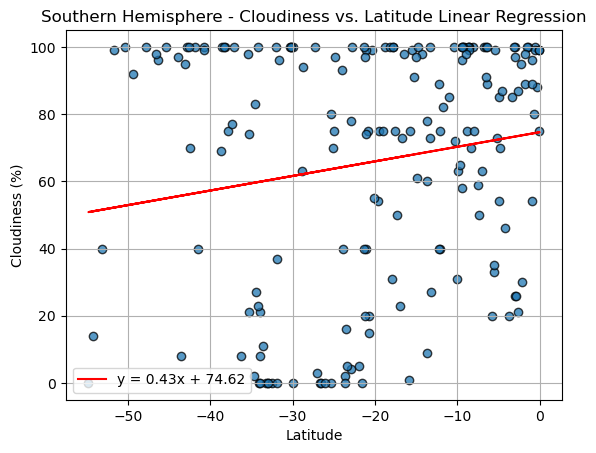

The r-value is: 0.1695671501527666


In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()
plt.show()

print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** The linear regression analysis for cloudiness vs. latitude in the Southern Hemisphere shows a weak positive correlation, indicated by the positive slope of the regression line. However, the correlation is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

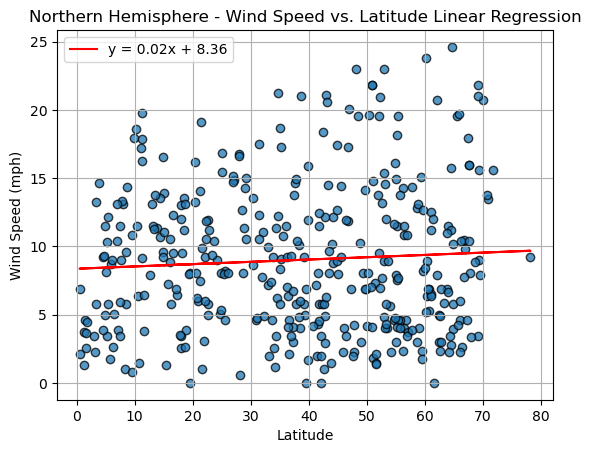

The r-value is: 0.06256223678703088


In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.legend()
plt.show()

print(f"The r-value is: {rvalue}")


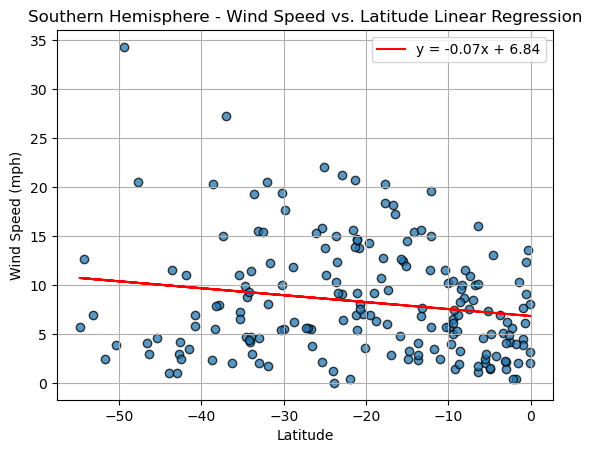

The r-value is: -0.1731207060541527


In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.legend()
plt.show()

print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** The linear relationship between latitude and wind speed in the Southern Hemisphere, as depicted by the scatter plot and regression line, appears to be weak. 